# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
import pandas as pd
import sqlite3

In [2]:
# make connection
con = sqlite3.connect("co_food_reddit.sqlite")
file = pd.read_sql_query('SELECT * FROM posts', con)

#close connection
con.close()
file

,title,link,author,total_comments,comments,score,text
0,Been living in Denver for a little over a year...,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,
1,Blue Pan Pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...
2,Madras Cafe is closing this month. What's the ...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...
3,This was pretty cool to see:,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,
4,Slovenian sausage and/or deli?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...
...,...,...,...,...,...,...,...
424,Birthday Dinner Recommendation,/r/denverfood/comments/198cml9/birthday_dinner...,thesnowgirl147,12,I had my birthday dinner at a the Wolf’s Tailo...,0,I am looking to have a more chill birthday thi...
425,Is there a place that sells Vietnamese salt co...,/r/denverfood/comments/197l8qe/is_there_a_plac...,DougDimmadummy,11,I don’t know for sure if its what your looking...,18,Same as the title says. I’m looking for a plac...
426,Where to find Nduja,/r/denverfood/comments/197sb95/where_to_find_n...,broccoli15,5,Any well stocked gourmet market should have it...,7,Like the title says. Looking to find Nduja ide...
427,What’s the best dumpling house in Denver/aurora?,/r/denverfood/comments/197dryi/whats_the_best_...,Mysterious-Monk4349,37,I love Nana's and the owner owns a few in Auro...,24,


## Method 1: keyword method

In [3]:
# extract the sentiment scores of the titles of the posts

sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word','score'],index_col = 'word')

In [4]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [5]:
# convert to dictionary format

sentiment_dict = sentiment_df.to_dict()['score']

In [10]:
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [11]:
import numpy as np 

title_sentiments = []

# for loop to get sentimental value of each word in title 
for title in file['title']:
    words = title.lower().split()
    this_title_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_title_sentiments.append(sentiment_dict[w])
        else:
            this_title_sentiments.append(0)
    title_sentiments.append(np.mean(this_title_sentiments))       

In [12]:
# creating a column in downloaded file
file['keyword_sentiment'] = title_sentiments

In [13]:
file.head()

,title,link,author,total_comments,comments,score,text,keyword_sentiment
0,Been living in Denver for a little over a year...,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,,0.000000
1,Blue Pan Pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...,0.000000
2,Madras Cafe is closing this month. What's the ...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...,0.230769
3,This was pretty cool to see:,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,,0.333333
4,Slovenian sausage and/or deli?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...,0.000000


<Axes: ylabel='Frequency'>

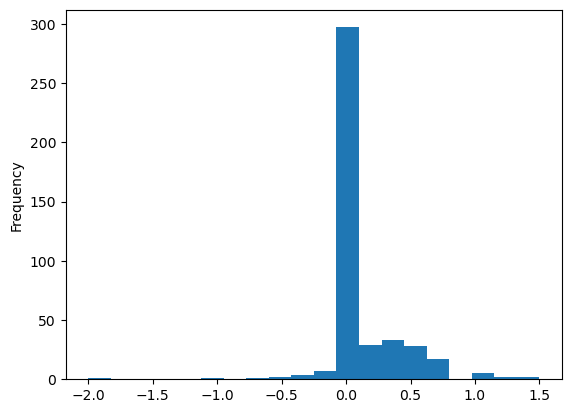

In [16]:
file['keyword_sentiment'].plot.hist(bins=20)

In [22]:
file['keyword_sentiment'].describe()

count    429.000000
mean       0.112995
std        0.294922
min       -2.000000
25%        0.000000
50%        0.000000
75%        0.166667
max        1.500000
Name: keyword_sentiment, dtype: float64

In [26]:

sorted_file = file.sort_values(by = 'keyword_sentiment', ascending = False )[['title','keyword_sentiment']]
sorted_file.head()

,title,keyword_sentiment
175,Worst Experience at Lo Stella,-0.60
387,Restaurant's Added Fees are Ridiculous,-0.60
391,Chipotle or Illegal Pete’s,-0.75
412,Missing Donuts,-1.00
413,Stuck,-2.00


In [27]:
# examine the text for some of the highest and lowest sentiment scores

sorted_file['title'][:10]

199                         Best paella?
146            best saturday happy hour?
232           Best Happy Hour in Denver?
329    Best Monday Night Nice Restaurant
201       Best Kid-Friendly restaurants?
29          Best Dessert Recommendations
113                    Best lunch sushi?
114                     Best Malai Kofta
9                     Best BRUNCH Denver
142               Best Negroni in Denver
Name: title, dtype: object

In [31]:
sorted_file['title'].tail(10)

315    Can't miss food recommendations for a visiting...
162                Place to go alone and possibly read? 
361    Plans to demolish Boulder's Dark Horse Tavern ...
258                                  Grease Trap Service
259         Hmm.. Why does pizza never get boring to me?
175                        Worst Experience at Lo Stella
387               Restaurant's Added Fees are Ridiculous
391                           Chipotle or Illegal Pete’s
412                                       Missing Donuts
413                                                Stuck
Name: title, dtype: object

## Method 2: NLTK

In [32]:
#!pip install nltk

In [39]:
# credit: https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
import nltk
#nltk.download('all')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /U

[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    | 

[nltk_data]    |   Unzipping corpora/wordnet_ic.zip.
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/hanamengistu/nltk_data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [40]:
# preprocess text function: cleans text to be easily processed for analysis

def preprocess_text(text):
    
    tokens = word_tokenize(text.lower()) # split the text into individual words and punctuation marks 
    
    #remove stop words
    
    filtered_tokens = []
    for token in tokens:
        if token not in stopwords.words('english'):
            filtered_tokens.append(token)
            
            
            
    # Lemmatize the tokens 
    # Ex: jummping --> jump (stemming) 
    # Ex: run,ran, running --> lemma "run" (Lemmatize)
    # reduce word to their root from 
    
    lemmatizer = WordNetLemmatizer()
    
    lemmatized_tokens = []
    for token in filtered_tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token))
        
    
    # join the tokens back into a string after being seprated in tokens 
    
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text



In [41]:
file['title'] = file['title'].apply(preprocess_text)

file

,title,link,author,total_comments,comments,score,text,keyword_sentiment
0,living denver little year - 's list,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,,0.000000
1,blue pan pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...,0.000000
2,madras cafe closing month . 's next best place...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...,0.230769
3,pretty cool see :,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,,0.333333
4,slovenian sausage and/or deli ?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...,0.000000
...,...,...,...,...,...,...,...,...
424,birthday dinner recommendation,/r/denverfood/comments/198cml9/birthday_dinner...,thesnowgirl147,12,I had my birthday dinner at a the Wolf’s Tailo...,0,I am looking to have a more chill birthday thi...,0.000000
425,place sell vietnamese salt coffee ?,/r/denverfood/comments/197l8qe/is_there_a_plac...,DougDimmadummy,11,I don’t know for sure if its what your looking...,18,Same as the title says. I’m looking for a plac...,0.000000
426,find nduja,/r/denverfood/comments/197sb95/where_to_find_n...,broccoli15,5,Any well stocked gourmet market should have it...,7,Like the title says. Looking to find Nduja ide...,0.000000
427,’ best dumpling house denver/aurora ?,/r/denverfood/comments/197dryi/whats_the_best_...,Mysterious-Monk4349,37,I love Nana's and the owner owns a few in Auro...,24,,0.428571


In [55]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# get sentiment function

def get_sentiment(text):
    
    scores = analyzer.polarity_scores(text)
    sentiment = scores['compound'] # gives decimal value 
    #if scores['pos'] > 0:
        #sentiment = 1
    #else:
        #sentiment = 0

    
    return sentiment


file['sentiment'] = file['title'].apply(get_sentiment)

file

,title,link,author,total_comments,comments,score,text,keyword_sentiment,sentiment
0,living denver little year - 's list,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,,0.000000,0.0000
1,blue pan pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...,0.000000,0.0000
2,madras cafe closing month . 's next best place...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...,0.230769,0.6369
3,pretty cool see :,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,,0.333333,0.6705
4,slovenian sausage and/or deli ?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...
424,birthday dinner recommendation,/r/denverfood/comments/198cml9/birthday_dinner...,thesnowgirl147,12,I had my birthday dinner at a the Wolf’s Tailo...,0,I am looking to have a more chill birthday thi...,0.000000,0.0000
425,place sell vietnamese salt coffee ?,/r/denverfood/comments/197l8qe/is_there_a_plac...,DougDimmadummy,11,I don’t know for sure if its what your looking...,18,Same as the title says. I’m looking for a plac...,0.000000,0.0000
426,find nduja,/r/denverfood/comments/197sb95/where_to_find_n...,broccoli15,5,Any well stocked gourmet market should have it...,7,Like the title says. Looking to find Nduja ide...,0.000000,0.0000
427,’ best dumpling house denver/aurora ?,/r/denverfood/comments/197dryi/whats_the_best_...,Mysterious-Monk4349,37,I love Nana's and the owner owns a few in Auro...,24,,0.428571,0.6808


In [51]:
sorted_file_new = file.sort_values(by = 'sentiment', ascending = False )[['title','sentiment']]
sorted_file_new.tail()

,title,sentiment
361,plan demolish boulder 's dark horse tavern dra...,-0.5106
354,go laptop book feel stupid near speer/cap hill...,-0.5267
391,chipotle illegal pete ’,-0.5574
175,worst experience lo stella,-0.6249
68,"til 2020 , diner denver , colorado `` stupid q...",-0.7783


In [52]:
sorted_file_new['title'].head(10)

402    found great wall . huge box oyster mushroom $ ...
232                             best happy hour denver ?
146                           best saturday happy hour ?
230    cool festival de bichos la diabla anyone inter...
223    sweet sourdough park hill . 're awesome ( food...
177    best mofongo denver ? willing drive suburb goo...
374           best place get good cocktail watching game
329                    best monday night nice restaurant
277                  best special occasion brunch denver
126                            best ayce daily special ?
Name: title, dtype: object

In [53]:
sorted_file_new['title'].tail(10)

258                                  grease trap service
387                   restaurant 's added fee ridiculous
109                     lead fool gold sandwich denver ?
124    sad taco tequila whiskey closing city park loc...
326          jovanina ’ broken italian quality italian ?
361    plan demolish boulder 's dark horse tavern dra...
354    go laptop book feel stupid near speer/cap hill...
391                              chipotle illegal pete ’
175                           worst experience lo stella
68     til 2020 , diner denver , colorado `` stupid q...
Name: title, dtype: object

# Summary

Write a short summary of what you did and the results here.

For this assignment, I began by retrieving my previous data using the sqlite3 library and executing MySQL commands. Once I had obtained my data, I commenced my sentiment analysis using Method 1, which involved the keyword approach.

In the keyword method, I utilized the AFINN-en-165.txt file provided for sentiment analysis. After downloading the file, I converted the DataFrame into a dictionary format. Subsequently, I proceeded to obtain the sentiment value for each title in my Reddit data. The process involved a loop that performed the following tasks: converting the title to lowercase format, splitting each word, and employing a nested loop to search for words from the Reddit titles in the sentiment word dictionary I had previously created. If the nested loop found the word in the dictionary, it appended the word along with its corresponding sentiment value into an array. If the word was not found, it was given a value of 0. Finally, all the sentiment values were stored in an array and added to a column within the Reddit DataFrame. Following this, I created a histogram plot of the sentiment values and provided a descriptive analysis of the sentiment values, which included statistical insights. Additionally, I examined the top 10 titles with the highest sentiment scores and the bottom 10 with the lowest sentiment scores.

Next, I conducted sentiment analysis using the NLTK method. When employing NLTK, I initially utilized a function called preprocess_text, which converted the provided text to lowercase, removed stopwords such as "the" and "and", and lemmatized the words. Essentially, this function cleaned the titles of the Reddit posts by eliminating unnecessary words and punctuations. Subsequently, I employed a function called get_sentiment, which utilized the predefined machine learning model analyzer = SentimentIntensityAnalyzer(). The sentiment score of the title was obtained using the code scores = analyzer.polarity_scores(text), and for this function, we utilized the compound score as it provided a comprehensive view of the sentiment value. After applying these functions to the entire dataset, it was observed that the descriptive statistics of the sentiment values differed from Method 1. Moreover, the top 10 and bottom 10 titles also differed from those obtained through Method 1.

There is a diffrent outcomes between the two methods do to the fact that the compound score does not represent the mean sentiment, unlike in the first method where it was calculated. Additionally, I believe that the divergent outcomes of the two methods may be due to the removal of stopwords and lemmatization of words in the NLTK method.In my opinion the NLTK method provides a more accurate analysis compared to the keyword method. One notable observation regarding the top 10 titles with high sentiment values versus the bottom 10 is the presence of positive words such as "best," "great," and "sweet" in the former, whereas the latter contains words like "trap," "worst," "missing," and "stuck," which typically carry negative connotations.